<a href="https://colab.research.google.com/github/scottthomaswx/Marine-Meteogram-Plotter/blob/main/MarineObs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install matplotlib
!pip install siphon
!pip install metpy
!pip install numpy
!pip install sounderpy
!pip install math
import matplotlib.pyplot as plt
from siphon.simplewebservice.ndbc import NDBC
from metpy.units import units
import numpy as np
import sounderpy as spy
import math

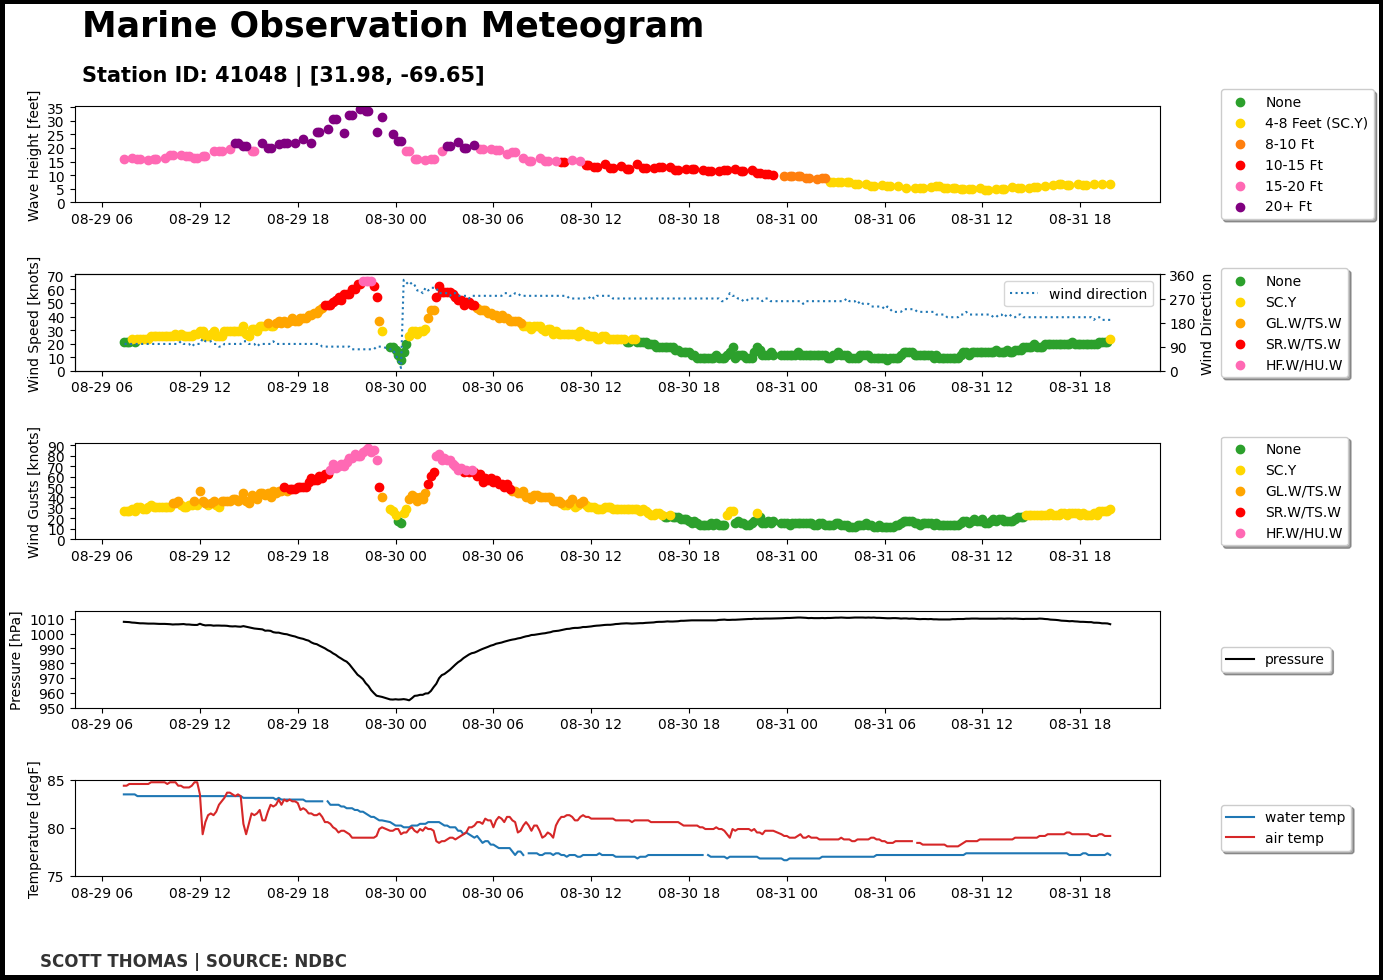

In [ ]:
# @markdown ## Enter A Station ID
# @markdown ### Find stations at: https://www.ndbc.noaa.gov/

station = '41048' #@param {type:"string"}

# @markdown ## How Many Data Points From Present Do You Want?

Number_Of_Data_Points = '360' #@param {type:"string"}


# @markdown ## Check what parameters you wish to plot
# @markdown ### Wave Information available for buoys only (Numeric ID)
# @markdown ### Not all stations will have all variables

#User Selects What Obs They Want To Plot

Wave_Heigt = True # @param {type:"boolean"}
Wind_Speed = True # @param {type:"boolean"}
Wind_Gusts = True # @param {type:"boolean"}
Pressure_Trace = True # @param {type:"boolean"}
Air_Water_Temp = True # @param {type:"boolean"}


#Station Pulled

df = NDBC.realtime_observations(station)
df = df.iloc[:int(Number_Of_Data_Points)]

#Convert Units
df['wave_height_ft'] = (df.wave_height.values*units.meters).to('feet')
df['wind_speed_kts'] = (df.wind_speed.values*units.meters/units.second).to('knots')
df['wind_gust_kts'] = (df.wind_gust.values*units.meters/units.second).to('knots')
df['air_temp_degf'] = (df.air_temperature.values*units.degC).to('degF')
df['water_temp_degf'] = (df.water_temperature.values*units.degC).to('degF')

#Create Sort Arrays
NoneWave_Time = []
NoneWave_Hgt = []
NoneSus_Time = []
NoneSus_Spd = []
NoneGus_Time = []
NoneGus_Spd = []

F8_Time = []
F8_Hgt = []
F10_Time = []
F10_Hgt = []
F15_Time = []
F15_Hgt = []
F20_Time = []
F20_Hgt = []

SCYWave_Time = []
SCYWave_Hgt = []
SCYSus_Time = []
SCYSus_Spd = []
SCYGus_Time = []
SCYGus_Spd = []

GLWSus_Time = []
GLWSus_Spd = []
GLWGus_Time = []
GLWGus_Spd = []

SRWSus_Time = []
SRWSus_Spd = []
SRWGus_Time = []
SRWGus_Spd = []

HRWSus_Time = []
HRWSus_Spd = []
HRWGus_Time = []
HRWGus_Spd = []
i=0
for t in df['time']:
    #Wave Check
    if df['wave_height_ft'][i] >= 4 and df['wave_height_ft'][i] < 8 :
        SCYWave_Time.append(df.time[i])
        SCYWave_Hgt.append(df.wave_height_ft[i])
    elif df['wave_height_ft'][i] < 4:
        NoneWave_Time.append(df.time[i])
        NoneWave_Hgt.append(df.wave_height_ft[i])
    elif df['wave_height_ft'][i] >=8 and df['wave_height_ft'][i] <10:
        F8_Time.append(df.time[i])
        F8_Hgt.append((df.wave_height_ft[i]))
    elif df['wave_height_ft'][i] >=10 and df['wave_height_ft'][i] <15:
        F10_Time.append(df.time[i])
        F10_Hgt.append((df.wave_height_ft[i]))
    elif df['wave_height_ft'][i] >=15 and df['wave_height_ft'][i] <20:
        F15_Time.append(df.time[i])
        F15_Hgt.append((df.wave_height_ft[i]))
    elif df['wave_height_ft'][i] >=20:
        F20_Time.append(df.time[i])
        F20_Hgt.append((df.wave_height_ft[i]))
    #Speed Check
    if df['wind_speed_kts'][i] <= 22:
        NoneSus_Time.append(df.time[i])
        NoneSus_Spd.append(df.wind_speed_kts[i])
    elif df['wind_speed_kts'][i] > 22 and df['wind_speed_kts'][i] <= 34:
        SCYSus_Time.append(df.time[i])
        SCYSus_Spd.append(df.wind_speed_kts[i])
    elif df['wind_speed_kts'][i] > 34 and df['wind_speed_kts'][i] <= 48:
        GLWSus_Time.append(df.time[i])
        GLWSus_Spd.append(df.wind_speed_kts[i])
    elif df['wind_speed_kts'][i] > 48 and df['wind_speed_kts'][i] <= 65:
        SRWSus_Time.append(df.time[i])
        SRWSus_Spd.append(df.wind_speed_kts[i])
    elif df['wind_speed_kts'][i] > 65:
        HRWSus_Time.append(df.time[i])
        HRWSus_Spd.append(df.wind_speed_kts[i])
    #GUST CHECK
    if df['wind_gust_kts'][i] <= 22:
        NoneGus_Time.append(df.time[i])
        NoneGus_Spd.append(df.wind_gust_kts[i])
    elif df['wind_gust_kts'][i] > 22 and df['wind_gust_kts'][i] <= 34:
        SCYGus_Time.append(df.time[i])
        SCYGus_Spd.append(df.wind_gust_kts[i])
    elif df['wind_gust_kts'][i] > 34 and df['wind_gust_kts'][i] <= 48:
        GLWGus_Time.append(df.time[i])
        GLWGus_Spd.append(df.wind_gust_kts[i])
    elif df['wind_gust_kts'][i] > 48 and df['wind_gust_kts'][i] <= 65:
        SRWGus_Time.append(df.time[i])
        SRWGus_Spd.append(df.wind_gust_kts[i])
    elif df['wind_gust_kts'][i] > 65:
        HRWGus_Time.append(df.time[i])
        HRWGus_Spd.append(df.wind_gust_kts[i])
    i+=1

plots_to_plot = []

if Wave_Heigt == True:
  plots_to_plot.append('wave')
if Wind_Speed == True:
  plots_to_plot.append('speed')
if Wind_Gusts == True:
  plots_to_plot.append('gust')
if Pressure_Trace == True:
  plots_to_plot.append('pres')
if Air_Water_Temp == True:
  plots_to_plot.append('temp')

def round_up_nearest(n):
    return 5 * math.ceil(n / 5)

def round_down_nearest(j):
    return 5 * math.floor(j / 5)

fig= plt.figure(figsize=(14, 10), facecolor='white', edgecolor="black", linewidth =6)

plt.figtext(0.95, 0.96, ' ')
plt.figtext(0.13, 0.95, 'Marine Observation Meteogram', ha='left', weight='bold', fontsize=25)
try:
  plt.figtext(0.13, 0.905, f'Station ID: {station} | {spy.buoy_latlon(station)}', ha='left', weight='bold', fontsize=15)
except:
  plt.figtext(0.13, 0.905, f'Station ID: {station}', ha='left', weight='bold', fontsize=15)
# Wave Height

if Wave_Heigt == True:
  ax1 = plt.subplot(len(plots_to_plot), 1, (plots_to_plot.index('wave')+1))
  ax1.set_ylim(0, (df['wave_height_ft'].max()+1))
  ax1.set_yticks(np.arange(0, (df['wave_height_ft'].max()+1),5))
  ax1.scatter(NoneWave_Time, NoneWave_Hgt, color = 'tab:green', label = 'None')
  ax1.scatter(SCYWave_Time, SCYWave_Hgt, color = 'gold', label = '4-8 Feet (SC.Y)')
  ax1.scatter(F8_Time, F8_Hgt, color = 'tab:orange', label = '8-10 Ft')
  ax1.scatter(F10_Time, F10_Hgt, color = 'red', label = '10-15 Ft')
  ax1.scatter(F15_Time, F15_Hgt, color = 'hotpink', label = '15-20 Ft')
  ax1.scatter(F20_Time, F20_Hgt, color = 'purple', label = '20+ Ft')
  ax1.set_ylabel('Wave Height [feet]')

  box1 = ax1.get_position()
  ax1.set_position([box1.x0, box1.y0, box1.width * 0.8, box1 .height])
  ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
      ncol=1, fancybox=True, shadow=True)

# Wind & Direction
if Wind_Speed == True:
  ax2 = plt.subplot(len(plots_to_plot), 1, (plots_to_plot.index('speed')+1))
  ax2b = ax2.twinx()
  if df['wind_speed_kts'].max() < 30:
    ax2.set_ylim(0, (df['wind_speed_kts'].max()+5))
    ax2.set_yticks(np.arange(0, (df['wind_speed_kts'].max()+5),5))
  else:
    ax2.set_ylim(0, (df['wind_speed_kts'].max()+5))
    ax2.set_yticks(np.arange(0, (df['wind_speed_kts'].max()+5),10))
  ax2b.set_ylim(0, 360)
  ax2b.set_yticks(np.arange(0, 361,90))
  ax2.scatter(NoneSus_Time, NoneSus_Spd, color = 'tab:green', label = 'None')
  ax2.scatter(SCYSus_Time, SCYSus_Spd, color = 'gold', label = 'SC.Y')
  ax2.scatter(GLWSus_Time, GLWSus_Spd, color = 'orange', label = 'GL.W/TS.W')
  ax2.scatter(SRWSus_Time, SRWSus_Spd, color = 'red', label = 'SR.W/TS.W')
  ax2.scatter(HRWSus_Time, HRWSus_Spd, color = 'hotpink', label = 'HF.W/HU.W')
  ax2b.plot(df['time'], df['wind_direction'], color='tab:blue', linestyle=':', label = 'wind direction')
  ax2.set_ylabel('Wind Speed [knots]')
  ax2b.set_ylabel('Wind Direction')

  box2 = ax2.get_position()
  ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2 .height])
  ax2.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
        ncol=1, fancybox=True, shadow=True)
  ax2b.legend(loc = 'best')

#Wind Gusts
if Wind_Gusts == True:
  ax3 = plt.subplot(len(plots_to_plot), 1, (plots_to_plot.index('gust')+1))
  if df['wind_gust_kts'].max() < 30:
    ax3.set_ylim(0, (df['wind_gust_kts'].max()+5))
    ax3.set_yticks(np.arange(0, (df['wind_gust_kts'].max()+5),5))
  else:
    ax3.set_ylim(0, (df['wind_gust_kts'].max()+5))
    ax3.set_yticks(np.arange(0, (df['wind_gust_kts'].max()+5),10))
  ax3.scatter(NoneGus_Time, NoneGus_Spd, color = 'tab:green', label = 'None')
  ax3.scatter(SCYGus_Time, SCYGus_Spd, color = 'gold', label = 'SC.Y')
  ax3.scatter(GLWGus_Time, GLWGus_Spd, color = 'orange', label = 'GL.W/TS.W')
  ax3.scatter(SRWGus_Time, SRWGus_Spd, color = 'red', label = 'SR.W/TS.W')
  ax3.scatter(HRWGus_Time, HRWGus_Spd, color = 'hotpink', label = 'HF.W/HU.W')
  ax3.set_ylabel('Wind Gusts [knots]')
  box3 = ax3.get_position()
  ax3.set_position([box3.x0, box3.y0, box3.width * 0.8, box3 .height])
  ax3.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
        ncol=1, fancybox=True, shadow=True)

#Pressure
if Pressure_Trace == True:
  ax4 = plt.subplot(len(plots_to_plot), 1,(plots_to_plot.index('pres')+1))
  ax4.set_ylim(round_down_nearest(df['pressure'].min()), round_up_nearest(df['pressure'].max()))
  ax4.set_yticks(np.arange(round_down_nearest(df['pressure'].min()), round_up_nearest(df['pressure'].max()+1),10))
  ax4.plot(df['time'], df['pressure'], color='black', label = 'pressure')
  ax4.set_ylabel('Pressure [hPa]')
  box4 = ax4.get_position()
  ax4.set_position([box4.x0, box4.y0, box4.width * 0.8, box4.height])
  ax4.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
      ncol=1, fancybox=True, shadow=True)

# Water/Air temperature
if Air_Water_Temp == True:
  ax5 = plt.subplot(len(plots_to_plot), 1, (plots_to_plot.index('temp')+1))
  if df['water_temp_degf'].max() <= df['air_temp_degf'].max():
    maxtemp = df['air_temp_degf'].max()
  if df['water_temp_degf'].max() >= df['air_temp_degf'].max():
    maxtemp = df['water_temp_degf'].max()
  if df['water_temp_degf'].min() <= df['air_temp_degf'].min():
    mintemp = df['water_temp_degf'].min()
  if df['water_temp_degf'].min() >= df['air_temp_degf'].min():
    mintemp = df['air_temp_degf'].min()
  ax5.set_ylim(round_down_nearest(mintemp), round_up_nearest(maxtemp))
  ax5.set_yticks(np.arange(round_down_nearest(mintemp),round_up_nearest(maxtemp)+1,5))
  ax5.plot(df['time'], df['water_temp_degf'], color='tab:blue', label = 'water temp')
  ax5.plot(df['time'], df['air_temp_degf'], color='tab:red', label = 'air temp')
  ax5.set_ylabel('Temperature [degF]')
  ax5.legend(loc = 'upper left')
  box5 = ax5.get_position()
  ax5.set_position([box5.x0, box5.y0, box5.width * 0.8, box5.height])
  ax5.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
        ncol=1, fancybox=True, shadow=True)

#Plot Settings
plt.subplots_adjust(hspace=0.75)
plt.subplots_adjust(wspace=0.25)
plt.figtext(0.1, 0.02, f'SCOTT THOMAS | SOURCE: NDBC', weight='bold', color='black', fontsize=12, ha='left', alpha=0.8)
plt.savefig(str(station)+'_full_marineobs.png')
plt.show()
